In [131]:
plt.close()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline, PchipInterpolator, Akima1DInterpolator
%matplotlib widget

# Read the intensity spectrum data file
file_path = '../COM/syntspec/p5777_g+4.4_m0.0_t01_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod_6400.-6800._xit1.0-LTE-intens.spec'

# Open the file and process the first line separately
with open(file_path, 'r') as f:
    header_line = f.readline().strip()  # Read and clean the first line
    # Extract mu-points by skipping the first entry
    mu_points = np.array([float(x) for x in header_line.split()[1:] if x.replace('.', '', 1).replace('E-', '').replace('E+', '').isdigit()])

# Load the remaining numerical data
data = np.genfromtxt(file_path, skip_header=1)

# Now, `mu_points` contains the mu values, and `data` has the numerical data rows
print("mu_points:", mu_points)
print("data shape:", data.shape)

# Load the remaining numerical data
data = np.genfromtxt(file_path, skip_header=1)

# Now, `mu_points` contains the mu values, and `data` has the numerical data rows
########
# Validate data shape
#print("Data shape:", data.shape)
num_mu = len(mu_points)
expected_columns = 3 + num_mu * 2
if data.shape[1] != expected_columns:
    raise ValueError(f"Expected {expected_columns} columns, but got {data.shape[1]}.")


# Extract columns
wavelength = data[:, 0]
absolute_flux = data[:, 2]

# Reshape intensity data for convolution (12 pairs for 12 mu values)
num_mu = len(mu_points)


intensity_data = data[:, 3:].reshape(-1, num_mu * 2)
absolute_intensity = intensity_data[:, ::2]




mu_points: [0.010018 0.052035 0.124619 0.222841 0.340008 0.468138 0.598497 0.722203
 0.830825 0.916958 0.974726 0.98     0.985    0.99     0.995    1.      ]
data shape: (40001, 35)


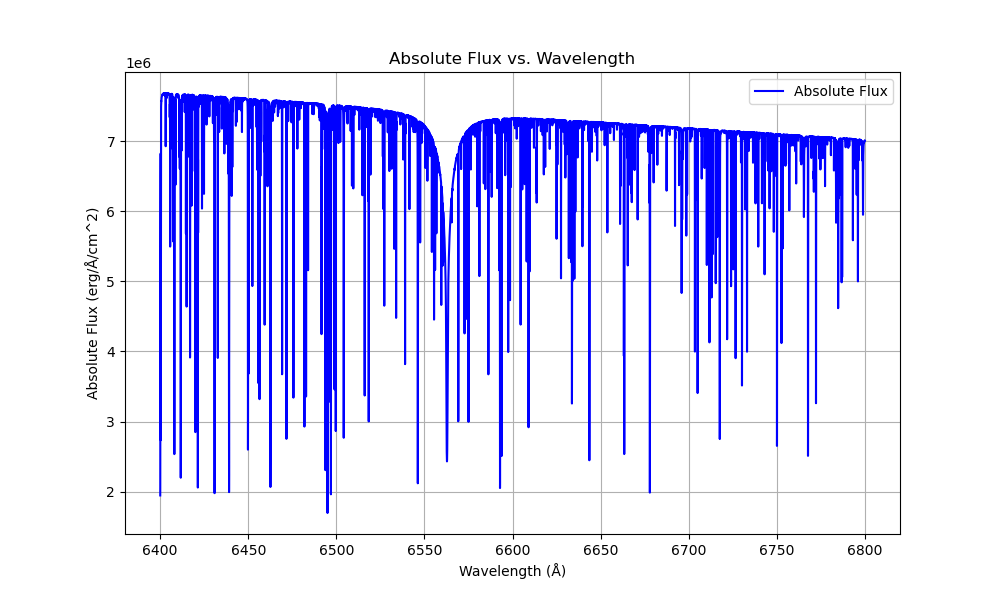

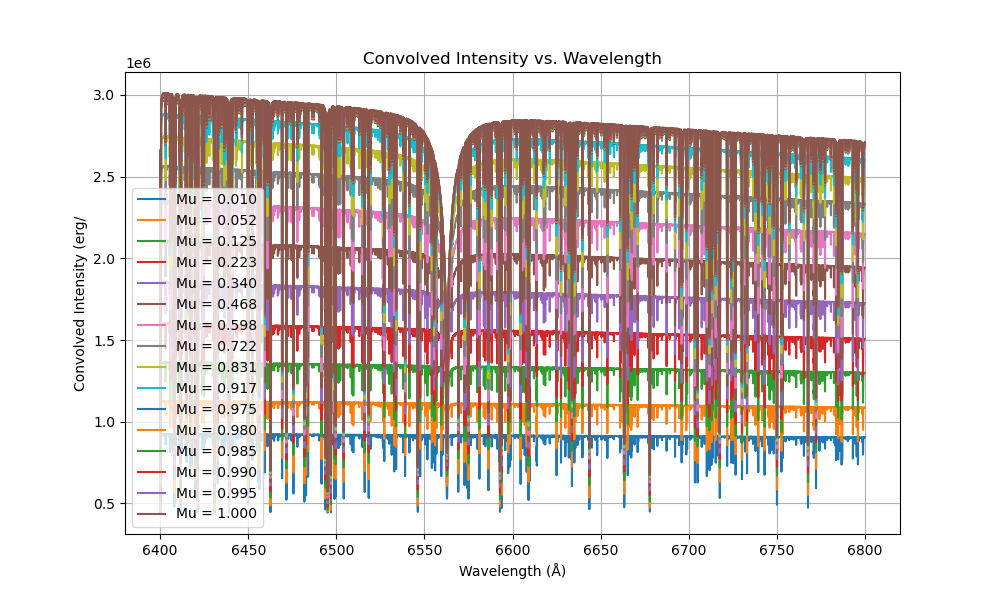

In [2]:
# Gaussian convolution over wavelength
def apply_gaussian_convolution(intensity, resolution, wavelength):
    delta_lambda = np.gradient(wavelength)
    sigma = (wavelength / resolution) / delta_lambda
    convolved = np.array([gaussian_filter1d(intensity[:, i], sigma[i]) for i in range(intensity.shape[1])]).T
    return convolved

# Define resolution and convolve
resolution = 100000  # Example spectral resolution
convolved_intensity = apply_gaussian_convolution(absolute_intensity, resolution, wavelength)

# Plot 1: Absolute Flux vs. Wavelength
plt.figure(figsize=(10, 6))
plt.plot(wavelength, absolute_flux, label="Absolute Flux", color="blue")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Absolute Flux (erg/Å/cm^2)")
plt.title("Absolute Flux vs. Wavelength")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Intensity vs. Mu
plt.figure(figsize=(10, 6))
for i, mu in enumerate(mu_points):
    #plt.plot(wavelength, convolved_intensity[:, i], label=f"Mu = {mu:.3f}")
    plt.plot(wavelength, absolute_intensity[:, i], label=f"Mu = {mu:.3f}")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Convolved Intensity (erg/")
plt.title("Convolved Intensity vs. Wavelength")
plt.legend()
plt.grid(True)
plt.show()

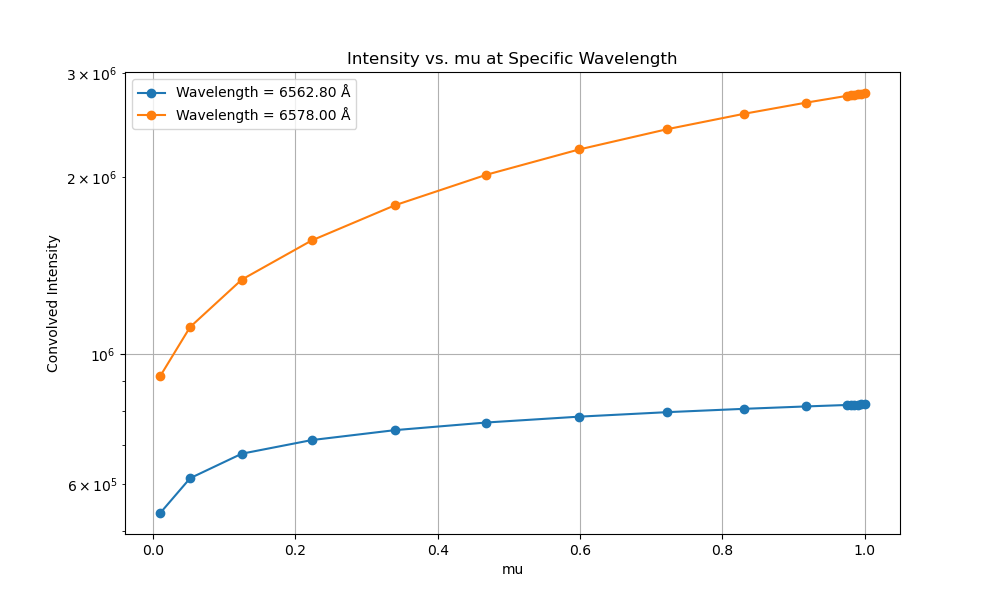

In [14]:
# Plot 3: Intensity vs. Mu for a chosen wavelength

def plot_intensity_vs_mu(chosen_wavelength1,chosen_wavelength2):
    # Find the index of the closest wavelength to the chosen value
    idx1 = (np.abs(wavelength - chosen_wavelength1)).argmin()
    chosen_intensity1 = convolved_intensity[idx1, :]
    idx2 = (np.abs(wavelength - chosen_wavelength2)).argmin()
    chosen_intensity2 = convolved_intensity[idx2, :]
    # first interpolate the intensity in mu 
    #interp_int = PchipInterpolator(mu_points, chosen_intensity)
    #mu_new = np.linspace(0., 1., num=1001)
    # Plot Intensity vs. Mu
    plt.figure(figsize=(10, 6))
    plt.plot(mu_points, chosen_intensity1, marker="o", label=f"Wavelength = {wavelength[idx1]:.2f} Å")
    plt.plot(mu_points, chosen_intensity2, marker="o", label=f"Wavelength = {wavelength[idx2]:.2f} Å")
    #plt.plot(mu_new, interp_int(mu_new), marker="o", label=f"Wavelength = {wavelength[idx]:.2f} Å")
    #plt.plot(mu_points, chosen_intensity, marker="o", label=f"Wavelength = {wavelength[idx]:.2f} Å")
    #plt.xlabel("mu")
    plt.xlabel("mu")
    plt.ylabel("Convolved Intensity")
    plt.title("Intensity vs. mu at Specific Wavelength")
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
chosen_wavelength1 = 6562.8
chosen_wavelength2 = 6578.
plot_intensity_vs_mu(chosen_wavelength1,chosen_wavelength2)

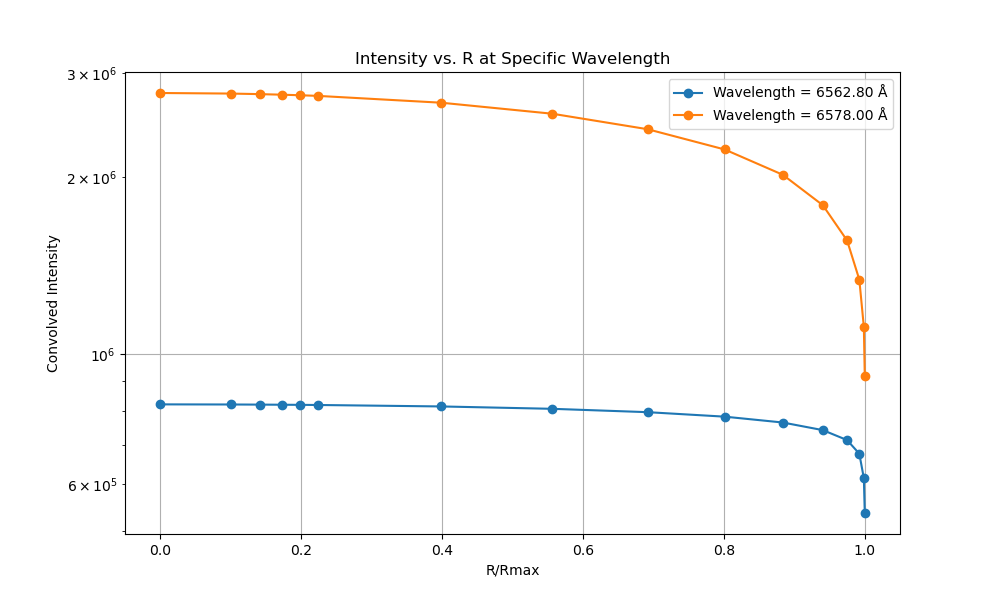

In [13]:
# Plot 4: Intensity vs. R/Rmax for a chosen wavelength

def plot_intensity_vs_R(chosen_wavelength1,chosen_wavelength2):
    # Find the index of the closest wavelength to the chosen value
    idx1 = (np.abs(wavelength - chosen_wavelength1)).argmin()
    chosen_intensity1 = convolved_intensity[idx1, :]
    idx2 = (np.abs(wavelength - chosen_wavelength2)).argmin()
    chosen_intensity2 = convolved_intensity[idx2, :]
    # Plot Intensity vs. R
    plt.figure(figsize=(10, 6))
    plt.plot((1.-mu_points**2)**0.5, chosen_intensity1, marker="o", label=f"Wavelength = {wavelength[idx1]:.2f} Å")
    plt.plot((1.-mu_points**2)**0.5, chosen_intensity2, marker="o", label=f"Wavelength = {wavelength[idx2]:.2f} Å")
    #plt.plot(mu_new, interp_int(mu_new), marker="o", label=f"Wavelength = {wavelength[idx]:.2f} Å")
    #plt.plot(mu_points, chosen_intensity, marker="o", label=f"Wavelength = {wavelength[idx]:.2f} Å")
    #plt.xlabel("mu")
    plt.xlabel("R/Rmax")
    plt.ylabel("Convolved Intensity")
    plt.title("Intensity vs. R at Specific Wavelength")
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
chosen_wavelength1 = 6562.8
chosen_wavelength2 = 6578.
plot_intensity_vs_R(chosen_wavelength1,chosen_wavelength2)